In [4]:
# environment setup, try to make it clear which library I'm using for what
import numpy as np  # nice arrays and other stuff
import sympy as sym # symbollic maths 
from sympy.matrices import Matrix # pretty matrices
from sympy import Eq # pretty equations
from sympy.solvers.solveset import linsolve
from sympy.physics.quantum.dagger import Dagger # we'll want this later...
from math import e, pi, sqrt # Mathy math math
from mpl_toolkits.mplot3d import Axes3D # we like 3d quivers for tutorials
import matplotlib.pyplot as plt # old standby for plotting like a villian
from IPython.display import display, Math, Latex # used to display formatted results in the console
sym.init_printing()  # initialize pretty printing


[[ 0.6883  0.6865  0.6847 ... -0.5879 -0.5897 -0.3719]
 [ 0.867   0.867   0.867  ... -0.859  -0.859  -0.867 ]]


'\nhorse = Transformations(data)   \nhorse.stretch(1.2, 1.2)   \nhorse.rotate(np.pi/2)\nplt.subplot(121),horse.display()\n\nhorse = Transformations(data)   \nhorse.compose_stretch_rotate(1.2,1.2,np.pi/2)\nplt.subplot(122),horse.display()\n'

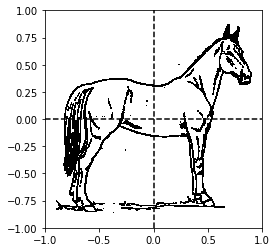

In [5]:
# Load the array from the .npy file
data = np.load("horse.npy")
print(data)
# Plot the x row against the y row with black pixels
#plt.plot(data[0], data[1], 'k,')

# Set the window limits to [-1,1] by [-1,1] and make the window square
#plt.axis([-1,1,-1,1])
#plt.gca().set_aspect("equal")
#plt.show

class Transformations:
    def __init__(self,data):
        self.x = data[0]
        self.y = data[1]
        self.T = eye(2)
        self.mean = (0,0) #FIXME, to set a mean/max/min for die achse
        
    def display(self):
        plt.plot(self.x, self.y, 'k,')
        plt.axis([-1,1,-1,1])
        plt.gca().set_aspect("equal")
        plt.axhline(0, color='black', linestyle='--')
        plt.axvline(0, color='black', linestyle='--')
        plt.show
        
    def stretch(self,a,b):
        self.x = a*self.x
        self.y = b*self.y
        
    def shear(self,a,b):
        tempx = self.x
        self.x += a*self.y
        self.y += b*tempx 
        
    def reflect(self,a,b):
        tempx  = self.x
        a2     = a*a
        b2     = b*b  
        ra2pb2 = 1.0/(a2+b2)        
        ra2b2  = (a2-b2)*ra2pb2
        rtab   = -2.0*a*b*ra2pb2
        self.x = -ra2b2*self.x + rtab*self.y
        self.y = rtab*tempx + ra2b2*self.y
        
    def rotate(self,theta):
        cth    = np.cos(theta)
        sth    = np.sin(theta)
        tempx  = self.x
        self.x = cth*self.x - sth*self.y
        self.y = sth*tempx  + cth*self.y
        
    def translate(self,a,b):
        self.x += a
        self.y += b
        
    def compose_stretch_rotate(self,a,b,theta):
        cth    = np.cos(theta)
        sth    = np.sin(theta)
        tempx  = self.x
        self.x = a*cth*self.x - b*sth*self.y
        self.y = a*sth*tempx  + b*cth*self.y

horse = Transformations(data)   
#horse.stretch(0.5, 1.2)   
#horse.shear(0.5,0)  
#horse.reflect(0,1)
#horse.rotate(np.pi/2)
#horse.translate(0.75, 0.5)
horse.display()



"""
horse = Transformations(data)   
horse.stretch(1.2, 1.2)   
horse.rotate(np.pi/2)
plt.subplot(121),horse.display()

horse = Transformations(data)   
horse.compose_stretch_rotate(1.2,1.2,np.pi/2)
plt.subplot(122),horse.display()
"""


In [32]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(x):
    horse.rotate(x)  # this actually dots transfrom, not what we want
    horse.display()
interact(f, x=(-np.pi,np.pi,np.pi/6))
#interact(f,x=widgets.IntSlider(min=-(np.pi), max=np.pi, step=.1, value=0.0)) # slider 

interactive(children=(FloatSlider(value=0.0, description='x', max=3.141592653589793, min=-3.141592653589793, s…

<function __main__.f(x)>